# Импорт

In [15]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import time
import pandas as pd
import numpy as np
import random
import datetime
from datetime import datetime
import warnings
import os, fnmatch
import yadisk
import shutil
import psycopg2
from sqlalchemy import create_engine
from matplotlib import pyplot as plt 
import seaborn as sns
from tqdm import tqdm

warnings.simplefilter('ignore')
options = webdriver.ChromeOptions()
now = datetime.now()
options.headless = True
token = '*****'
dir_ = "*****"

EXE_PATH = r'C:\chromedriver.exe'

dates = {
    'января':'01',
    'февраля':'02',
    'марта':'03',
    'апреля':'04',
    'мая':'05',
    'июня':'06',
    'июля':'07',
    'августа':'08',
    'сентября':'09',
    'октября':'10',
    'ноября':'11',
    'декабря':'12'
}

host_2 = '*****'
user_2 = '*****'
password_2 = '*****'
db_name_2 = '*****'
port_2 = 5432

connection_2 = psycopg2.connect(
host=host_2,
    user=user_2,
    password=password_2,
    database = db_name_2,
    port=port_2
)


connection_2.autocommit = True

SQL_insert = "INSERT INTO zemlya_ishevsk (type, adres, area, square, price, distance, m_price, date, url_link, ad_number, description)\
VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s);"

db_config = {'user': '*****', # имя пользователя
'pwd': '*****', # пароль
'host': '*****',
'port': 5432, # порт подключения
'db': '*****'} # название базы данных

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
 db_config['pwd'],
 db_config['host'],
 db_config['port'],
 db_config['db']) 

engine = create_engine(connection_string)

y = yadisk.YaDisk(token=token)
print(y.check_token())

True


# Функции

In [ ]:
query = "SELECT * FROM zemlya_links"
links = pd.io.sql.read_sql(query, con = engine)['links'].to_list()

In [2]:


def get_date_type(date):
    try:
        return datetime.strptime(date, "%d.%m.%Y")
    except:        
        return datetime.strptime(date[:10], "%Y-%m-%d")
def get_types(type_):
    if type_ == 'izhs':
        return ('ИЖС')
    if type_ == 'snt dnp':
        return ('СНТ, ДНП')
    if type_ == 'promnaznacheniya':
        return('Промназначения')
    if type_:
        return ('Неизвестно')
    
def get_square_type(square):
    if 0 < square <= 500:
        return ('0 - 5 соток')
    if 500 < square <= 2500:
        return ('5 - 25 соток')
    if 2500 < square <= 5000:
        return ('25 - 50 соток')
    if 5000 < square <= 10000:
        return ('50 - 100 соток')
    if square > 10000:
        return ('больше 100 соток')

def get_pages_number():
    pages = driver.find_elements("class name", "pagination-item-JJq_j")
    pages_ = []
    for page in pages:    
        if page.text.isdigit():        
            pages_.append(int(page.text))
    return(max(pages_))

def get_norm_links():
    all_links = []
    elems = driver.find_elements("xpath" ,"//a[@href]")
    for elem in elems:
        all_links.append(elem.get_attribute("href"))
    norm_links = []
    for link in all_links:
        if link.split('_')[-1].isdigit():
            norm_links.append(link)
    return(list(set(norm_links)))

def is_bad_adv(i,j):
    try:
        driver.find_element("class name", "closed-warning-block-_5cSD").text
        print(f'{"***"*14} № {(j+i)} из {len(links)} {"***"*14}')
        print(url)
        print('Страницы не существует')
        return(True)
    except:
        
        try:
            driver.find_element("class name", "desktop-16c9mq7").text
            print(f'{"***"*14} № {(j+i)} из {len(links)} {"***"*14}')
            print(url)
            print('Страницы не существует')
            return(True)
        except:        
            try:
                driver.find_element("class name", "closed-warning-content-2ooy4").text
                print(f'{"***"*14} № {(j+i)} из {len(links)} {"***"*14}')
                print('Снято с публикации')
                print(url)
                return(True)
            except:
                try:
                    driver.find_element("class name", "page-title-count-wQ7pG").text
                    print(f'{"***"*14} № {(j+i)} из {len(links)} {"***"*14}')
                    print(url)
                    print('Страница поиска, объявления нет')
                    return(True)
                except:
                        try:
                            driver.find_element("class name", "b-404").text
                            print(f'{"***"*14} № {(j+i)} из {len(links)} {"***"*14}')
                            print('Нет такой страницы')
                            print(url)
                            return(True)
                        except:
                            return(False)

def get_adress():
    try:
        try:
            adress = driver.find_element("class name", "style-item-address__string-3Ct0s")
            return(adress.text)
        except:
            pass
        try:
            adress = driver.find_element("class name", "style-item-address__string-wt61A")
            return(adress.text)
        except:
            pass
    except:
        print('Ошибка в адресе')
        print(url)
        return(None)
def get_rayon():
    try:
       
        try:
            rayon = driver.find_element("class name", "style-item-address-georeferences-item-18pFt")
            return(rayon.text)
        except:
            pass
        
        try:
            rayon = driver.find_element("class name", "style-item-address-georeferences-item-TZsrp")
            return(rayon.text)
        except:
            pass
    
    except:        
        return(None)
    
def get_params():
    try:
        if len(driver.find_elements("class name", "params-paramsList__item-1Xeok")) > 0:
            params = driver.find_elements("class name", "params-paramsList__item-1Xeok")
            params_ = []
            for param in params:
                params_.append(param.text.split(':'))
            param_list = []
            for param in params_:
                  param_list.extend(param)
            return param_list
        
        if len(driver.find_elements("class name", "params-paramsList-zLpAu")) > 0:
            param_list = driver.find_elements("class name", "params-paramsList-zLpAu")[0].text.replace('\n', ' ').split(' ')
            return param_list
    except:
        print('Ошибка в параметрах')
        print(url)
        return('ERRROR')
    
def get_square(kv_par):
    try:
        try:
            x = (kv_par[kv_par.index('Площадь')+1]).strip()
            if 'сот' in x:
                x = float(x.split(' ')[0]) * 100
                return(x) 
        except:
            pass
        try:
            x = (kv_par[kv_par.index('Площадь:')+1]).strip()
            if 'сот' in (kv_par[kv_par.index('Площадь:')+2]).strip():
                x = float(x.split(' ')[0]) * 100
                return(x)
        except:
            pass
        
    except:        
        return(None)
    
def get_type(url):
    if url.split('_')[-2] == 'dnp':
        return (' '.join( url.split('_')[-3:-1]))
    else:
        return (url.split('_')[-2])
        
def get_price():
    try:
        test = driver.find_element("class name", "style-item-view-price-content-1aHxn")
    except:
        pass
    try:
        test = driver.find_element("class name", "style-item-price-PuQ0I")
    except:
        pass
    i = 0
    price = ''
    while True:
        if test.text[i].isdigit() or test.text[i] == ' ':
            price += test.text[i]
            i +=1
        elif i > len(test.text):
            break
        else:
            break
    try:
        return(float(price.replace(' ', '')))
    except:        
        return(None)
    
def get_date():
    try:
        #1 ексепт
        try:
            test = driver.find_element("class name", "style-item-metadata-date-1y5w6")
            return(' '.join(test.text.split()[:2]) + ' ' + str(time.localtime().tm_year))
        except:
            pass
        
        # 2 ексепт
        try:
            test = driver.find_element("class name", "style-item-metadata-date-EEthc")
            return(' '.join(test.text.split()[:2]) + ' ' + str(time.localtime().tm_year))
        except:
            pass
        
        #3 ексепт
        try:
            test = driver.find_element("class name", "style-item-footer-3uXQz")
            if 'сегодн' in test.text.split()[3]:
                return(str(now.day) +'.'+  str(now.month)+'.'+ str(now.year))
            if 'вчер' in test.text.split()[3]:                
                return(str(now.day-1) +'.'+  str(now.month)+'.'+ str(now.year))
            else:
                date = (test.text.split()[3]+ ' '+ test.text.split()[4]+' '+ str(now.year))
                date = date.split()
                date[1] = dates[date[1]]
                return('.'.join(date))
        except:
            pass
        try:
            test = driver.find_element("class name", "style-item-footer-Ufxh_")
            if 'сегодн' in test.text.split()[3]:
                return(str(now.day) +'.'+  str(now.month)+'.'+ str(now.year))
            if 'вчер' in test.text.split()[3]:                
                return(str(now.day-1) +'.'+  str(now.month)+'.'+ str(now.year))
            else:
                date = (test.text.split()[3]+ ' '+ test.text.split()[4]+' '+ str(now.year))
                date = date.split()
                date[1] = dates[date[1]]
                return('.'.join(date))
        except:
            pass
            
    except:        
        return(None)
    
def get_view():
    try:
        try:
            test = driver.find_element("class name", "style-item-description-pL_gy")
            return(test.text.replace('\n', ' '))
        except:
            pass
        try:
            test = driver.find_element("class name", "style-item-description-html-1_RNo")
            return(test.text.replace('\n', ' '))
        except:
            pass
        try:
            test = driver.find_element("class name", "style-item-description-text-SzN56")
            return(test.text.replace('\n', ' '))
        except:
            pass
        try:
            test = driver.find_element("class name", "style-item-description-text-mc3G6")
            return(test.text.replace('\n', ' '))
        except:
            pass
    except:
        return None
    
def get_distance(params):
    try:
        try:
            dist = params[params.index('Расстояние до центра города')+1].strip()
            return dist
        except:
            pass
        try:
            dist = params[params.index('города:')+1].strip()
            return dist
        except:
            pass
    except:
        return None
    
def yandex():
    print('Начинаем перенос скринов на Я.диск')
    # Собираем файлы
    files = []
    listOfFiles = os.listdir('screenshots')  
    pattern = "*.png"  
    for entry in listOfFiles:  
        if fnmatch.fnmatch(entry, pattern):            
                files.append(entry)
    # переносим в другую директорию
    for file in files:
        shutil.move('screenshots' +'\\' + file, os.getcwd())
    #записываем на Я.Диск
    c = 0        
    for file in files:
        print(f'Записываем {file}')
        if y.is_file(f'{dir_}{file}'):
            print('Такой уже есть')
            continue
        else:
            c+=1
            y.upload(file, f'{dir_}{file}')
    #удаляем файлы       
    files = []
    listOfFiles = os.listdir('.')  
    pattern = "*.png"  
    for entry in listOfFiles:  
        if fnmatch.fnmatch(entry, pattern):            
                files.append(entry)
    for file in files:
        os.remove(file)

    print(f'{c} файлов записано на Я.Диск')

# Парсер линки

In [3]:
# Парсим Линки по земле
driver = webdriver.Chrome(executable_path=EXE_PATH, chrome_options=options)
driver.get('https://www.avito.ru/izhevsk/zemelnye_uchastki/prodam-ASgBAgICAUSWA9oQ?p=1')
page_numbers = get_pages_number()
print(f'Всего страниц {page_numbers}')

links = []
for i in tqdm(range(1, page_numbers+1)):
    driver = webdriver.Chrome(executable_path=EXE_PATH, chrome_options=options)
    driver.get(f'https://www.avito.ru/izhevsk/zemelnye_uchastki/prodam-ASgBAgICAUSWA9oQ?p={i}')
    links.extend(get_norm_links())
    driver.close()
    time.sleep(random.randint(5,12))
links = set(links)
print(f'Всего линков спарсено: {len(links)}')


with connection_2.cursor() as cursor:
    cursor.execute(
    '''
    TRUNCATE zemlya_links        
   
    '''
    )

query = "SELECT * FROM zemlya_ishevsk"
old_links = pd.io.sql.read_sql(query, con = engine)['url_link'].to_list()

for link in links:
    if link not in old_links:
        with connection_2.cursor() as cursor:
            cursor.execute(f'''INSERT INTO zemlya_links (links) VALUES ('{link}')''')
            
print('Линки записаны в БД')
query = "SELECT * FROM zemlya_links"
links = pd.io.sql.read_sql(query, con = engine)
print(f'Новых линков: {len(links)}')    

Всего страниц 38


100%|██████████████████████████████████████████████████████████████████████████████████| 38/38 [35:24<00:00, 55.91s/it]


Всего линков спарсено: 1697
Линки записаны в БД
Новых линков: 561


# Парсинг карточек

In [8]:
# сброс счетчика

counts_ = '0'

with connection_2.cursor() as cursor:
    cursor.execute(
    f'''UPDATE zemlya_count
    SET count = {counts_}'''
    )

In [3]:
query = "SELECT * FROM zemlya_count"
test = pd.io.sql.read_sql(query, con = engine) 
i = int(test['count'].values[0])
i

465

In [4]:
query = "SELECT * FROM zemlya_count"
test = pd.io.sql.read_sql(query, con = engine) 
i = int(test['count'].values[0])
options.headless = True

query = "SELECT * FROM zemlya_links"
links = pd.io.sql.read_sql(query, con = engine)['links'].to_list()

df = {}
df['Назначение'] = [] 
df['Адрес'] = [] 
df['Район'] = []  
df['Площадь'] = [] 
df['Стоимость'] = [] 
df['Расстояние до центра города'] = []
df['Стоимость метра'] = [] 
df['Дата объявления'] = []
df['Ссылка'] = [] 
df['Номер объявления'] = [] 
df['Описание'] = []

for j,url in enumerate (links[i:]):
    driver = webdriver.Chrome(executable_path=EXE_PATH, chrome_options=options)
    driver.get(url)
    
    if j % 5 == 0 and j > 1:
        counts_ = i+j
        with connection_2.cursor() as cursor:
            cursor.execute(
            f'''UPDATE zemlya_count
            SET count = {counts_}'''
            )
        
        df = pd.DataFrame(df)
        for q in range (len(df)):
            values_ = []
            for value in df.loc[q].values:
                values_.append(str(value))
            with connection_2.cursor() as cursor:
                    cursor.execute(
                    SQL_insert, [*values_]
                    )
        
        print(f'Записано в бд')
        yandex()
        df = {}
        df['Назначение'] = [] 
        df['Адрес'] = [] 
        df['Район'] = []  
        df['Площадь'] = [] 
        df['Стоимость'] = [] 
        df['Расстояние до центра города'] = []
        df['Стоимость метра'] = [] 
        df['Дата объявления'] = []
        df['Ссылка'] = [] 
        df['Номер объявления'] = [] 
        df['Описание'] = []
        print(f'Данные записаны на {i+j} позиции')
        
        
    if is_bad_adv(i,j):
        driver.close()
        time.sleep(2)
        continue  
        
    try:            
        params = get_params()
        df['Назначение'].append(get_types(get_type(url)))
        df['Адрес'].append(get_adress())
        df['Район'].append(get_rayon())  
        df['Площадь'].append(get_square(params))
        df['Стоимость'].append(get_price())
        df['Расстояние до центра города'].append(get_distance(params))
        try:
            df['Стоимость метра'].append(round(df['Стоимость'][-1]/df['Площадь'][-1],2))
        except:
            print('Ошибка в определении стоимости метра кв.')
            df['Стоимость метра'].append(None)
        
        df['Дата объявления'].append(get_date())
        df['Ссылка'].append(url) 
        df['Номер объявления'].append(df['Ссылка'][-1].split('_')[-1])
        df['Описание'].append(get_view())
        
        print(f'{"***"*14} № {(j+i)} из {len(links)} {"***"*14}')
        if df["Адрес"][-1] == None:
            print(f'Адрес: {df["Адрес"][-1]}')
        if df["Район"][-1] == None:
            print(f'Район: {df["Район"][-1]}')
        if df["Площадь"][-1] == None:
            print(f'Площадь: {df["Площадь"][-1]}')              
        if df["Стоимость"][-1] == None:
            print(f'Стоимость: {df["Стоимость"][-1]}')
        if df["Стоимость метра"][-1] == None:
            print(f'Стоимость за 1 кв.м.: {df["Стоимость метра"][-1]}')
           
        if df["Расстояние до центра города"][-1] == None:
            print(f'Расстояние до центра города: {df["Расстояние до центра города"][-1]}')
        if df["Дата объявления"][-1] == None:
            print(f'Дата объявления: {df["Дата объявления"][-1]}') 
        if df["Описание"][-1] == None:
            print(f'Описание: {df["Описание"][-1]}') 
        
        #print(f'Назначение: {df["Назначение"][-1]}')
        #print(f'Адрес: {df["Адрес"][-1]}')
        #print(f'Площадь: {df["Площадь"][-1]}')
        #print(f'Стоимость: {df["Стоимость"][-1]}')
        #print(f'Цена метра: {df["Стоимость метра"][-1]}')
        #print(f'Расстояние до города: {df["Расстояние до центра города"][-1]}')
        print(f'Ссылка: {df["Ссылка"][-1]}')
        
        
        S = lambda X: driver.execute_script('return document.body.parentNode.scroll'+X)
        driver.set_window_size(S('Width'),S('Height')) # May need manual adjustment                                                                                                                
        driver.find_element('tag name' ,'body').screenshot(f'screenshots/{url.split("_")[-1]}.png')
        print('Скриншот сделан')
        driver.quit()
        
        print()
        
    except:
        print('Тут что-то пошло не так (ошибка с вылетом скрипта):')
        print(url)
        break
        
        #j +=1
    
    time.sleep(random.randint(5,12))
        
df = pd.DataFrame(df)
for q in range (len(df)):
    values_ = []
    for value in df.loc[q].values:
        values_.append(str(value))
    with connection_2.cursor() as cursor:
            cursor.execute(
            SQL_insert, [*values_]
            )
yandex()
print('Конец')

****************************************** № 465 из 561 ******************************************
Расстояние до центра города: None
Ссылка: https://www.avito.ru/izhevsk/zemelnye_uchastki/uchastok_46sot._snt_dnp_2373351811
Скриншот сделан

****************************************** № 466 из 561 ******************************************
Район: None
Ссылка: https://www.avito.ru/izhevsk/zemelnye_uchastki/uchastok_12_sot._izhs_2082421881
Скриншот сделан

****************************************** № 467 из 561 ******************************************
Район: None
Ссылка: https://www.avito.ru/izhevsk/zemelnye_uchastki/uchastok_8sot._snt_dnp_2557068214
Скриншот сделан

****************************************** № 468 из 561 ******************************************
Район: None
Ссылка: https://www.avito.ru/izhevsk/zemelnye_uchastki/uchastok_102sot._izhs_2501562531
Скриншот сделан

****************************************** № 469 из 561 ******************************************
Расстояние д

Записываем 1765012564.png
Такой уже есть
Записываем 2041897158.png
Такой уже есть
Записываем 2176871517.png
Такой уже есть
Записываем 2422729171.png
2 файлов записано на Я.Диск
Данные записаны на 495 позиции
****************************************** № 495 из 561 ******************************************
Расстояние до центра города: None
Ссылка: https://www.avito.ru/izhevsk/zemelnye_uchastki/uchastok_35sot._izhs_2319009855
Скриншот сделан

****************************************** № 496 из 561 ******************************************
Расстояние до центра города: None
Ссылка: https://www.avito.ru/izhevsk/zemelnye_uchastki/uchastok_114_sot._izhs_2231362208
Скриншот сделан

****************************************** № 497 из 561 ******************************************
Расстояние до центра города: None
Ссылка: https://www.avito.ru/izhevsk/zemelnye_uchastki/uchastok_10_sot._izhs_2378582964
Скриншот сделан

****************************************** № 498 из 561 **********************

Скриншот сделан

Записано в бд
Начинаем перенос скринов на Я.диск
Записываем 2432139432.png
Такой уже есть
Записываем 2471803707.png
Такой уже есть
Записываем 2501823779.png
Записываем 2524758834.png
Такой уже есть
Записываем 969839758.png
Такой уже есть
1 файлов записано на Я.Диск
Данные записаны на 525 позиции
****************************************** № 525 из 561 ******************************************
Расстояние до центра города: None
Ссылка: https://www.avito.ru/izhevsk/zemelnye_uchastki/uchastok_74sot._snt_dnp_2463843266
Скриншот сделан

****************************************** № 526 из 561 ******************************************
Район: None
Ссылка: https://www.avito.ru/izhevsk/zemelnye_uchastki/uchastok_10sot._izhs_2216943567
Скриншот сделан

****************************************** № 527 из 561 ******************************************
Район: None
Ссылка: https://www.avito.ru/izhevsk/zemelnye_uchastki/uchastok_195sot._izhs_2544776999
Скриншот сделан

***************

Скриншот сделан

****************************************** № 554 из 561 ******************************************
Район: None
Ссылка: https://www.avito.ru/izhevsk/zemelnye_uchastki/uchastok_103_sot._izhs_2090045500
Скриншот сделан

Записано в бд
Начинаем перенос скринов на Я.диск
Записываем 2090045500.png
Такой уже есть
Записываем 2386142620.png
Такой уже есть
Записываем 2500878324.png
Записываем 2501422078.png
Записываем 2512239877.png
Такой уже есть
2 файлов записано на Я.Диск
Данные записаны на 555 позиции
****************************************** № 555 из 561 ******************************************
Расстояние до центра города: None
Ссылка: https://www.avito.ru/izhevsk/zemelnye_uchastki/uchastok_105sot._izhs_2441686083
Скриншот сделан

****************************************** № 556 из 561 ******************************************
Район: None
Ссылка: https://www.avito.ru/izhevsk/zemelnye_uchastki/uchastok_10_sot._izhs_2186972500
Скриншот сделан

*****************************

# Предобработка

In [16]:
query = "SELECT * FROM zemlya_ishevsk"
df = pd.io.sql.read_sql(query, con = engine)
df = df[df.columns[1:]]
df.head()

,type,adres,area,square,price,distance,m_price,date,url_link,ad_number,description
0,"СНТ, ДНП","Удмуртская Республика, Ижевск, ул. Трудовая Пчела",р-н Ленинский,600.0,500000.0,None,833.33,7.09.2022,https://www.avito.ru/izhevsk/zemelnye_uchastki...,2531421091,"Описание Пасека в аренде на 49 лет,6 сот. есть..."
1,"СНТ, ДНП","Удмуртская Республика, Завьяловский р-н, СНТ З...",None,1000.0,250000.0,21,250.0,7.09.2022,https://www.avito.ru/izhevsk/zemelnye_uchastki...,2425743450,Описание Продам огород 10 соток. Собственность...
2,"СНТ, ДНП","Удмуртская Республика, Завьяловский р-н, СНТ З...",None,800.0,380000.0,10,475.0,21.08.2022,https://www.avito.ru/izhevsk/zemelnye_uchastki...,2398524082,"Описание Продам участок, дорога отсыпана газ н..."
3,"СНТ, ДНП","Удмуртская Республика, Завьяловский р-н, СНТ В...",None,950.0,300000.0,15,315.79,17.08.2022,https://www.avito.ru/izhevsk/zemelnye_uchastki...,2438604570,"Описание На участке есть дом(бревенчатый 4*4, ..."
4,ИЖС,"Удмуртская Республика, Завьяловский р-н, д. Ст...",None,800.0,650000.0,17,812.5,1.09.2022,https://www.avito.ru/izhevsk/zemelnye_uchastki...,2509031490,Описание Продам земельный участок 8 соток в ми...


In [17]:
df.duplicated(subset=['ad_number']).sum()

29

In [18]:
df = df.drop_duplicates()
cols = df.columns
for col in cols:
    print(f'{col}: {df[col].isna().sum()}')

type: 0
adres: 0
area: 0
square: 0
price: 0
distance: 0
m_price: 0
date: 0
url_link: 0
ad_number: 0
description: 0


In [24]:
for col in cols:
    print(f'{col}: {(df[col] == "nan").sum()}')

type: 0
adres: 0
area: 0
square: 0
price: 0
distance: 0
m_price: 0
date: 0
url_link: 0
ad_number: 0
description: 0


In [20]:
df = df[df['square'] != 'nan']

In [23]:
for col in cols:
    print(f'{col}: {(df[col] == "None").sum()}')

type: 0
adres: 0
area: 1360
square: 0
price: 0
distance: 710
m_price: 0
date: 0
url_link: 0
ad_number: 0
description: 0


In [22]:
df['square'] = df['square'].apply(float)
df['price'] = df['price'].apply(float)
df['m_price'] = df['m_price'].apply(float)
df['square_type'] = df['square'].apply(get_square_type)
df['datetime'] = df['date'].apply(get_date_type)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2071 entries, 0 to 2076
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   type         2071 non-null   object        
 1   adres        2071 non-null   object        
 2   area         2071 non-null   object        
 3   square       2071 non-null   float64       
 4   price        2071 non-null   float64       
 5   distance     2071 non-null   object        
 6   m_price      2071 non-null   float64       
 7   date         2071 non-null   object        
 8   url_link     2071 non-null   object        
 9   ad_number    2071 non-null   object        
 10  description  2071 non-null   object        
 11  square_type  2071 non-null   object        
 12  datetime     2071 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(9)
memory usage: 226.5+ KB


In [14]:
df.to_excel('zemlya_izhevsk.xlsx', index=0)

In [25]:
df.to_csv('zemlya_izhevsk.csv', index=0)

# Общий быстрый анализ

In [33]:
df.groupby('type')['price'].count()

type
ИЖС               1009
Промназначения      46
СНТ, ДНП           457
Name: price, dtype: int64

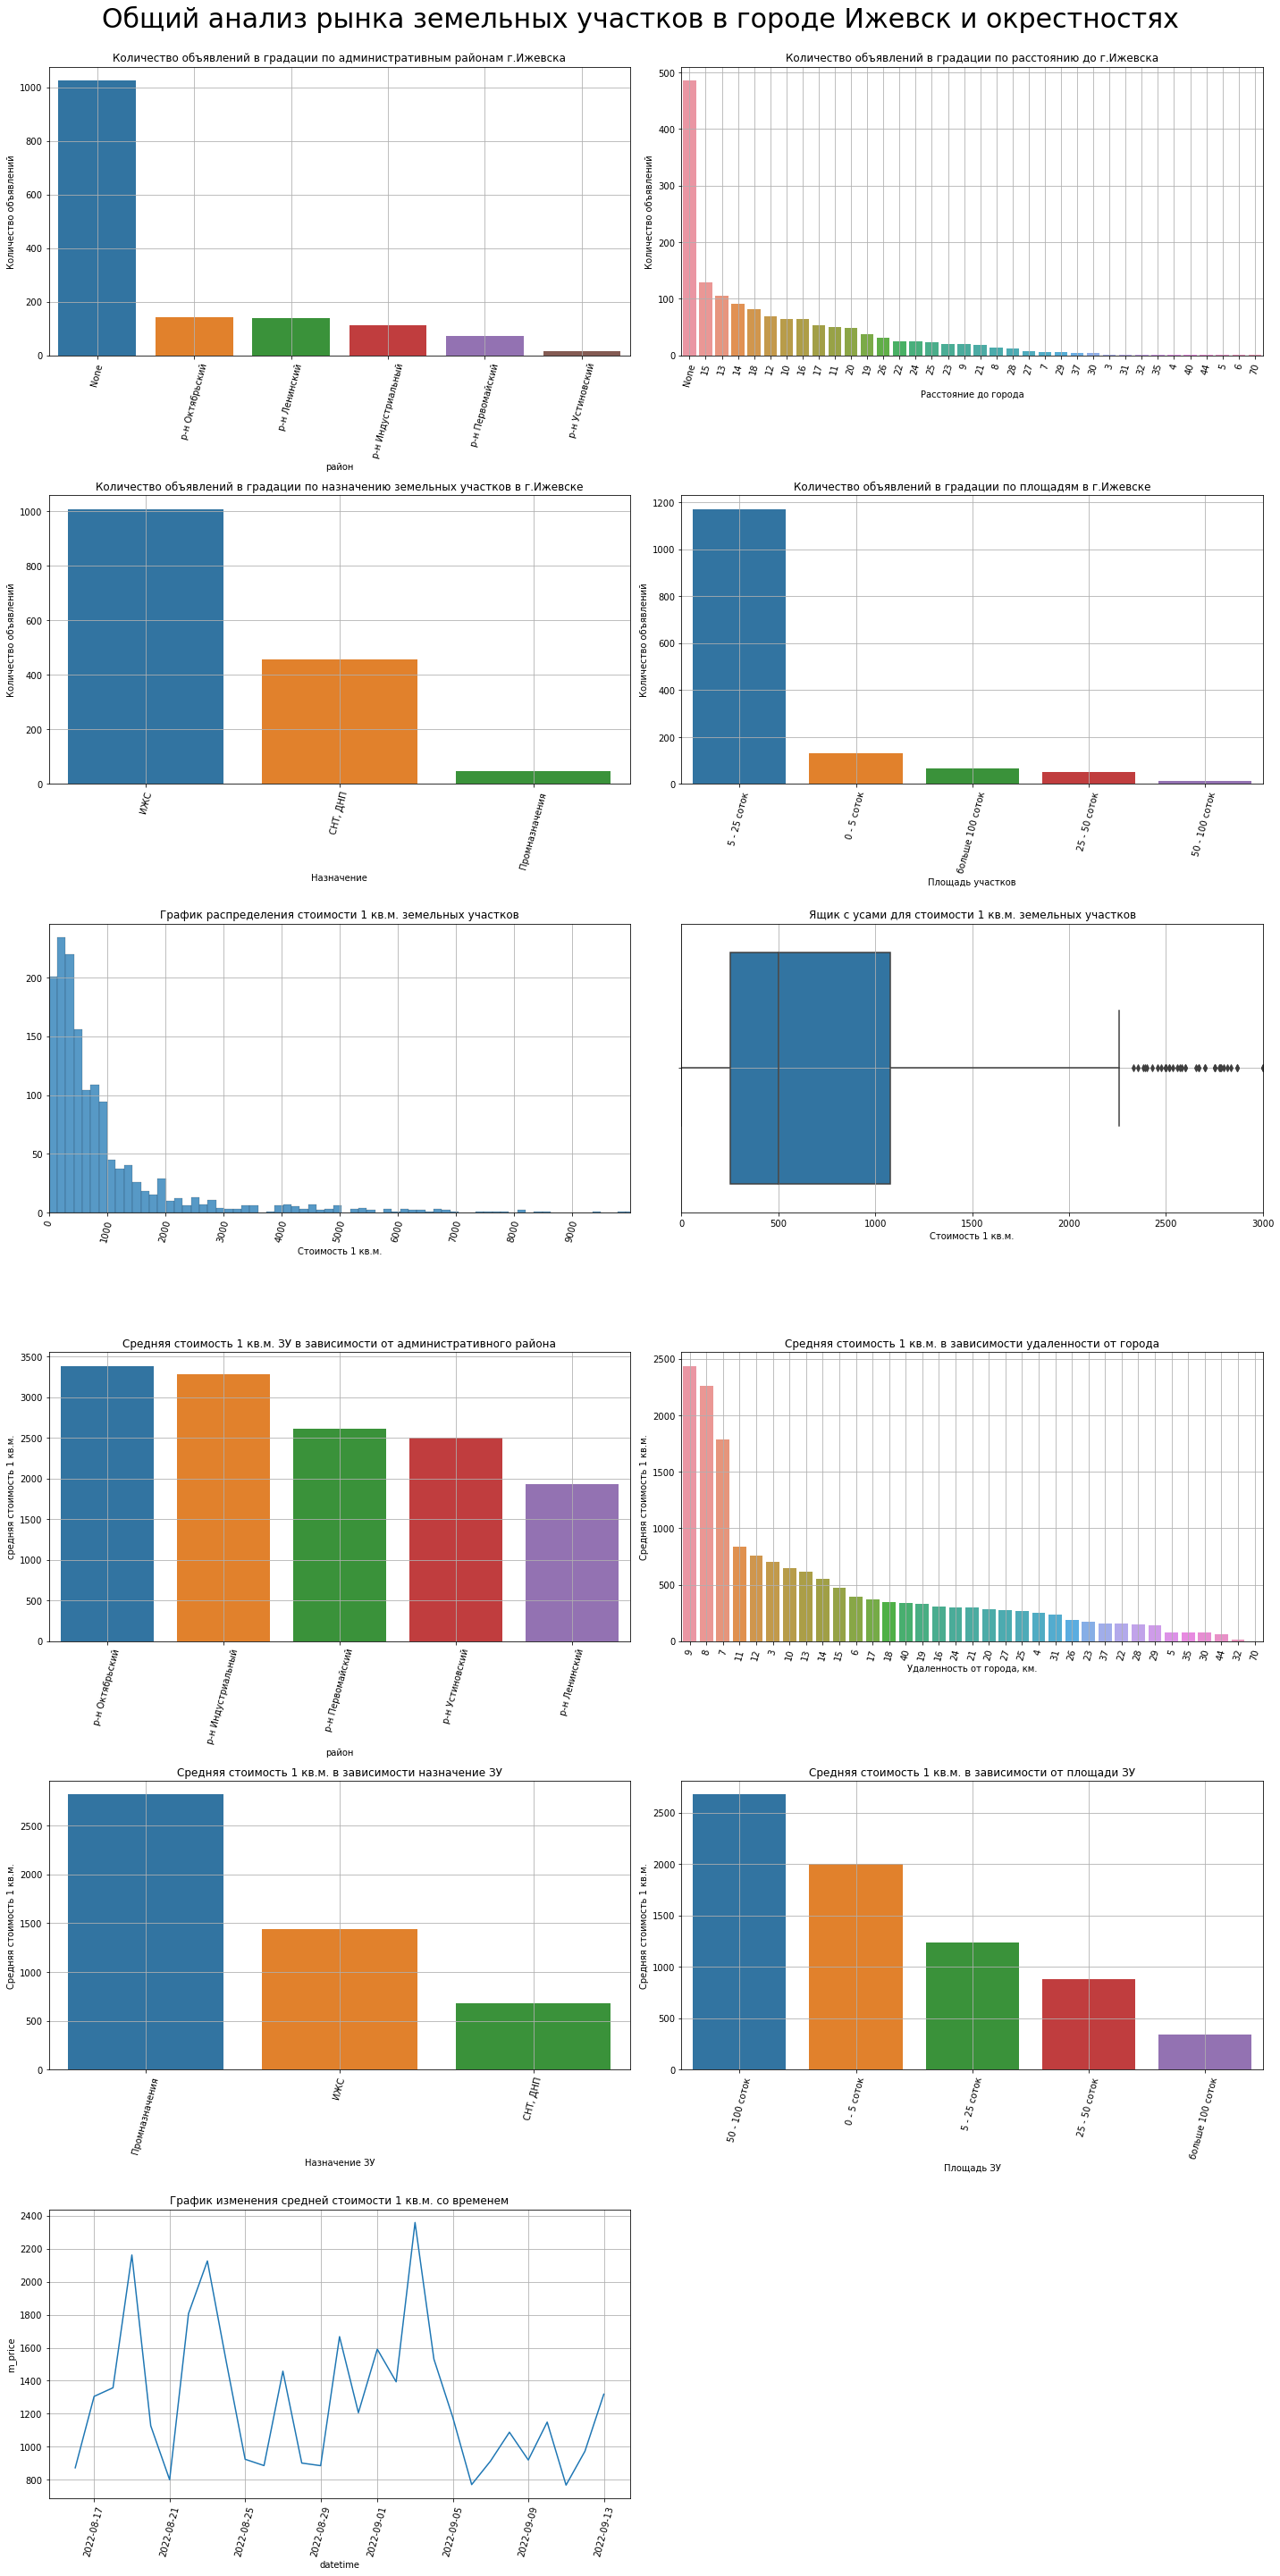

In [42]:
plt.figure(figsize=(20,40))
plt.suptitle('Общий анализ рынка земельных участков в городе Ижевск и окрестностях',
             y = 1,
             fontsize = 30)
draw = df.groupby('area')['price'].count().reset_index().sort_values(by='price', ascending=False)\
.rename(columns={'area': 'район', 'price': 'Количество объявлений'})
sns.barplot(draw['район'], draw['Количество объявлений'], ax=plt.subplot(6, 2, 1))
plt.title('Количество объявлений в градации по административным районам г.Ижевска')
plt.xticks(rotation=75)
plt.grid()
plt.tight_layout()

draw = df.groupby('distance')['price'].count().reset_index().sort_values(by='price', ascending=False)\
.rename(columns={'distance': 'Расстояние до города', 'price': 'Количество объявлений'})
sns.barplot(draw['Расстояние до города'], draw['Количество объявлений'], ax=plt.subplot(6, 2, 2))
plt.title('Количество объявлений в градации по расстоянию до г.Ижевска')
plt.xticks(rotation=75)
plt.grid()
plt.tight_layout()

draw = df.groupby('type')['price'].count().reset_index().sort_values(by='price', ascending=False)\
.rename(columns={'type': 'Назначение', 'price': 'Количество объявлений'})
sns.barplot(draw['Назначение'], draw['Количество объявлений'], ax=plt.subplot(6, 2, 3))
plt.title('Количество объявлений в градации по назначению земельных участков в г.Ижевске')
plt.xticks(rotation=75)
plt.grid()
plt.tight_layout()

draw = df.groupby('square_type')['price'].count().reset_index().sort_values(by='price', ascending=False)\
.rename(columns={'square_type': 'Площадь участков', 'price': 'Количество объявлений'})
sns.barplot(draw['Площадь участков'], draw['Количество объявлений'], ax=plt.subplot(6, 2, 4))
plt.title('Количество объявлений в градации по площадям в г.Ижевске')
plt.xticks(rotation=75)
plt.grid()
plt.tight_layout()

sns.histplot(df['m_price'], ax=plt.subplot(6, 2, 5))
plt.grid()
plt.xlim(0,10000)
plt.xticks(range(0,10000, 1000), rotation=75)
plt.title('График распределения стоимости 1 кв.м. земельных участков')
plt.ylabel(None)
plt.xlabel('Стоимость 1 кв.м.')
plt.tight_layout()

sns.boxplot(df['m_price'], ax=plt.subplot(6, 2, 6))
plt.grid()
plt.xlim(0,3000)
#plt.xticks(range(0,220000, 10000), rotation=75)
plt.title('Ящик с усами для стоимости 1 кв.м. земельных участков')
plt.ylabel(None)
plt.xlabel('Стоимость 1 кв.м.')
plt.tight_layout()

draw = df.groupby('area')['m_price'].agg(['mean', 'median']).sort_values(by='mean', ascending=False)\
.reset_index().rename(columns={'area': 'район', 'mean': 'средняя стоимость 1 кв.м.', 'median': 'медианная стоимость 1 кв.м.'})
draw = draw[draw['район'] != 'None']
sns.barplot(draw['район'], draw['средняя стоимость 1 кв.м.'], ax=plt.subplot(6, 2, 7))
plt.title('Средняя стоимость 1 кв.м. ЗУ в зависимости от административного района')
plt.xticks(rotation=75)
plt.grid()
plt.tight_layout()

draw = df.groupby('distance')['m_price'].mean().reset_index().sort_values(by='m_price', ascending=False)\
.rename(columns={'distance': 'Удаленность от города, км.', 'm_price': 'Средняя стоимость 1 кв.м.'})
draw = draw[draw['Удаленность от города, км.'] != 'None']
sns.barplot(draw['Удаленность от города, км.'], draw['Средняя стоимость 1 кв.м.'], ax=plt.subplot(6, 2, 8))
plt.title('Средняя стоимость 1 кв.м. в зависимости удаленности от города')
plt.xticks(rotation=75)
plt.grid()
plt.tight_layout()

draw = df.groupby('type')['m_price'].mean().reset_index().sort_values(by='m_price', ascending=False)\
.rename(columns={'type': 'Назначение ЗУ', 'm_price': 'Средняя стоимость 1 кв.м.'})
sns.barplot(draw['Назначение ЗУ'], draw['Средняя стоимость 1 кв.м.'], ax=plt.subplot(6, 2, 9))
plt.title('Средняя стоимость 1 кв.м. в зависимости назначение ЗУ')
plt.xticks(rotation=75)
plt.grid()
plt.tight_layout()

draw = df.groupby('square_type')['m_price'].mean().reset_index().sort_values(by='m_price', ascending=False)\
.rename(columns={'square_type': 'Площадь ЗУ', 'm_price': 'Средняя стоимость 1 кв.м.'})
sns.barplot(draw['Площадь ЗУ'], draw['Средняя стоимость 1 кв.м.'], ax=plt.subplot(6, 2, 10))
plt.title('Средняя стоимость 1 кв.м. в зависимости от площади ЗУ')
plt.xticks(rotation=75)
plt.grid()
plt.tight_layout()


draw = df[['datetime','m_price']].groupby('datetime')['m_price'].mean()[1:-1].reset_index().sort_values(by='datetime')
sns.lineplot(data=draw, x='datetime', y = 'm_price', ax=plt.subplot(6, 2, 11))
plt.title('График изменения средней стоимости 1 кв.м. со временем')
plt.xticks(rotation=75)
plt.grid()
plt.tight_layout()
